In [2]:
!pip3 install plotly
!pip3 install imblearn

In [3]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

## Read the Data

In [4]:
data_df = pd.read_csv(r"/Users/deepanshu/Downloads/creditcard.csv")

## Check the Data

In [5]:
print("Credit Card Fraud Detection data -  rows:",data_df.shape[0]," columns:", data_df.shape[1])

Credit Card Fraud Detection data -  rows: 284807  columns: 31


## Glimpse the Data

We start by looking to the data features (first 5 rows).

In [6]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
data_df.shape

(284807, 31)

In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
data_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Looking to the **Time** feature, we can confirm that the data contains **284,807** transactions, during 2 consecutive days (or **172792** seconds).

## Check missing Data

Let's check if there is any missing data.

In [11]:
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,...,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There is no missing data in the entire dataset.

## StandardScaler

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()
data_df['Amount'] = sc.fit_transform(pd.DataFrame(data_df['Amount']))


In [14]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [15]:
data_df = data_df.drop(['Time'], axis =1)

## Drop Duplicates

In [16]:
data_df.duplicated().any()

np.True_

In [17]:
data_df = data_df.drop_duplicates()
data_df.shape

(275663, 30)

## Features Correlation

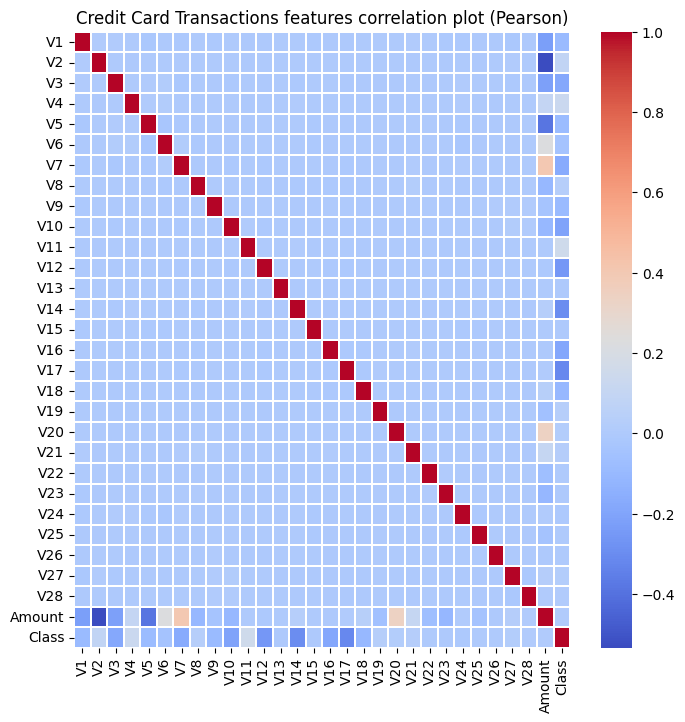

In [18]:
plt.figure(figsize = (8,8))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data_df.corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,linewidths=0.1 ,cmap="coolwarm")
plt.show()

### Inferences from Correlation Heatmap

- The diagonal shows perfect correlation (**1.0**) of each feature with itself (expected).  
- Most features (V1–V28) show **very low correlation** with each other.  
- Since these features are PCA-transformed, they are **designed to be uncorrelated**.  
- **No strong correlations (|r| > 0.8)** are observed between different features → no multicollinearity issue.  
- The **`Amount`** feature has weak correlation with a few components, but not strongly enough to be removed.  
- The **`Class`** (fraud label) has weak correlation with features (expected, since fraud detection is complex).  

### Implications
- **No features need to be dropped** due to correlation.  
- We can proceed with modeling steps: **SMOTE → cross-validation → hyperparameter tuning**.  
  


## Features Density Plot

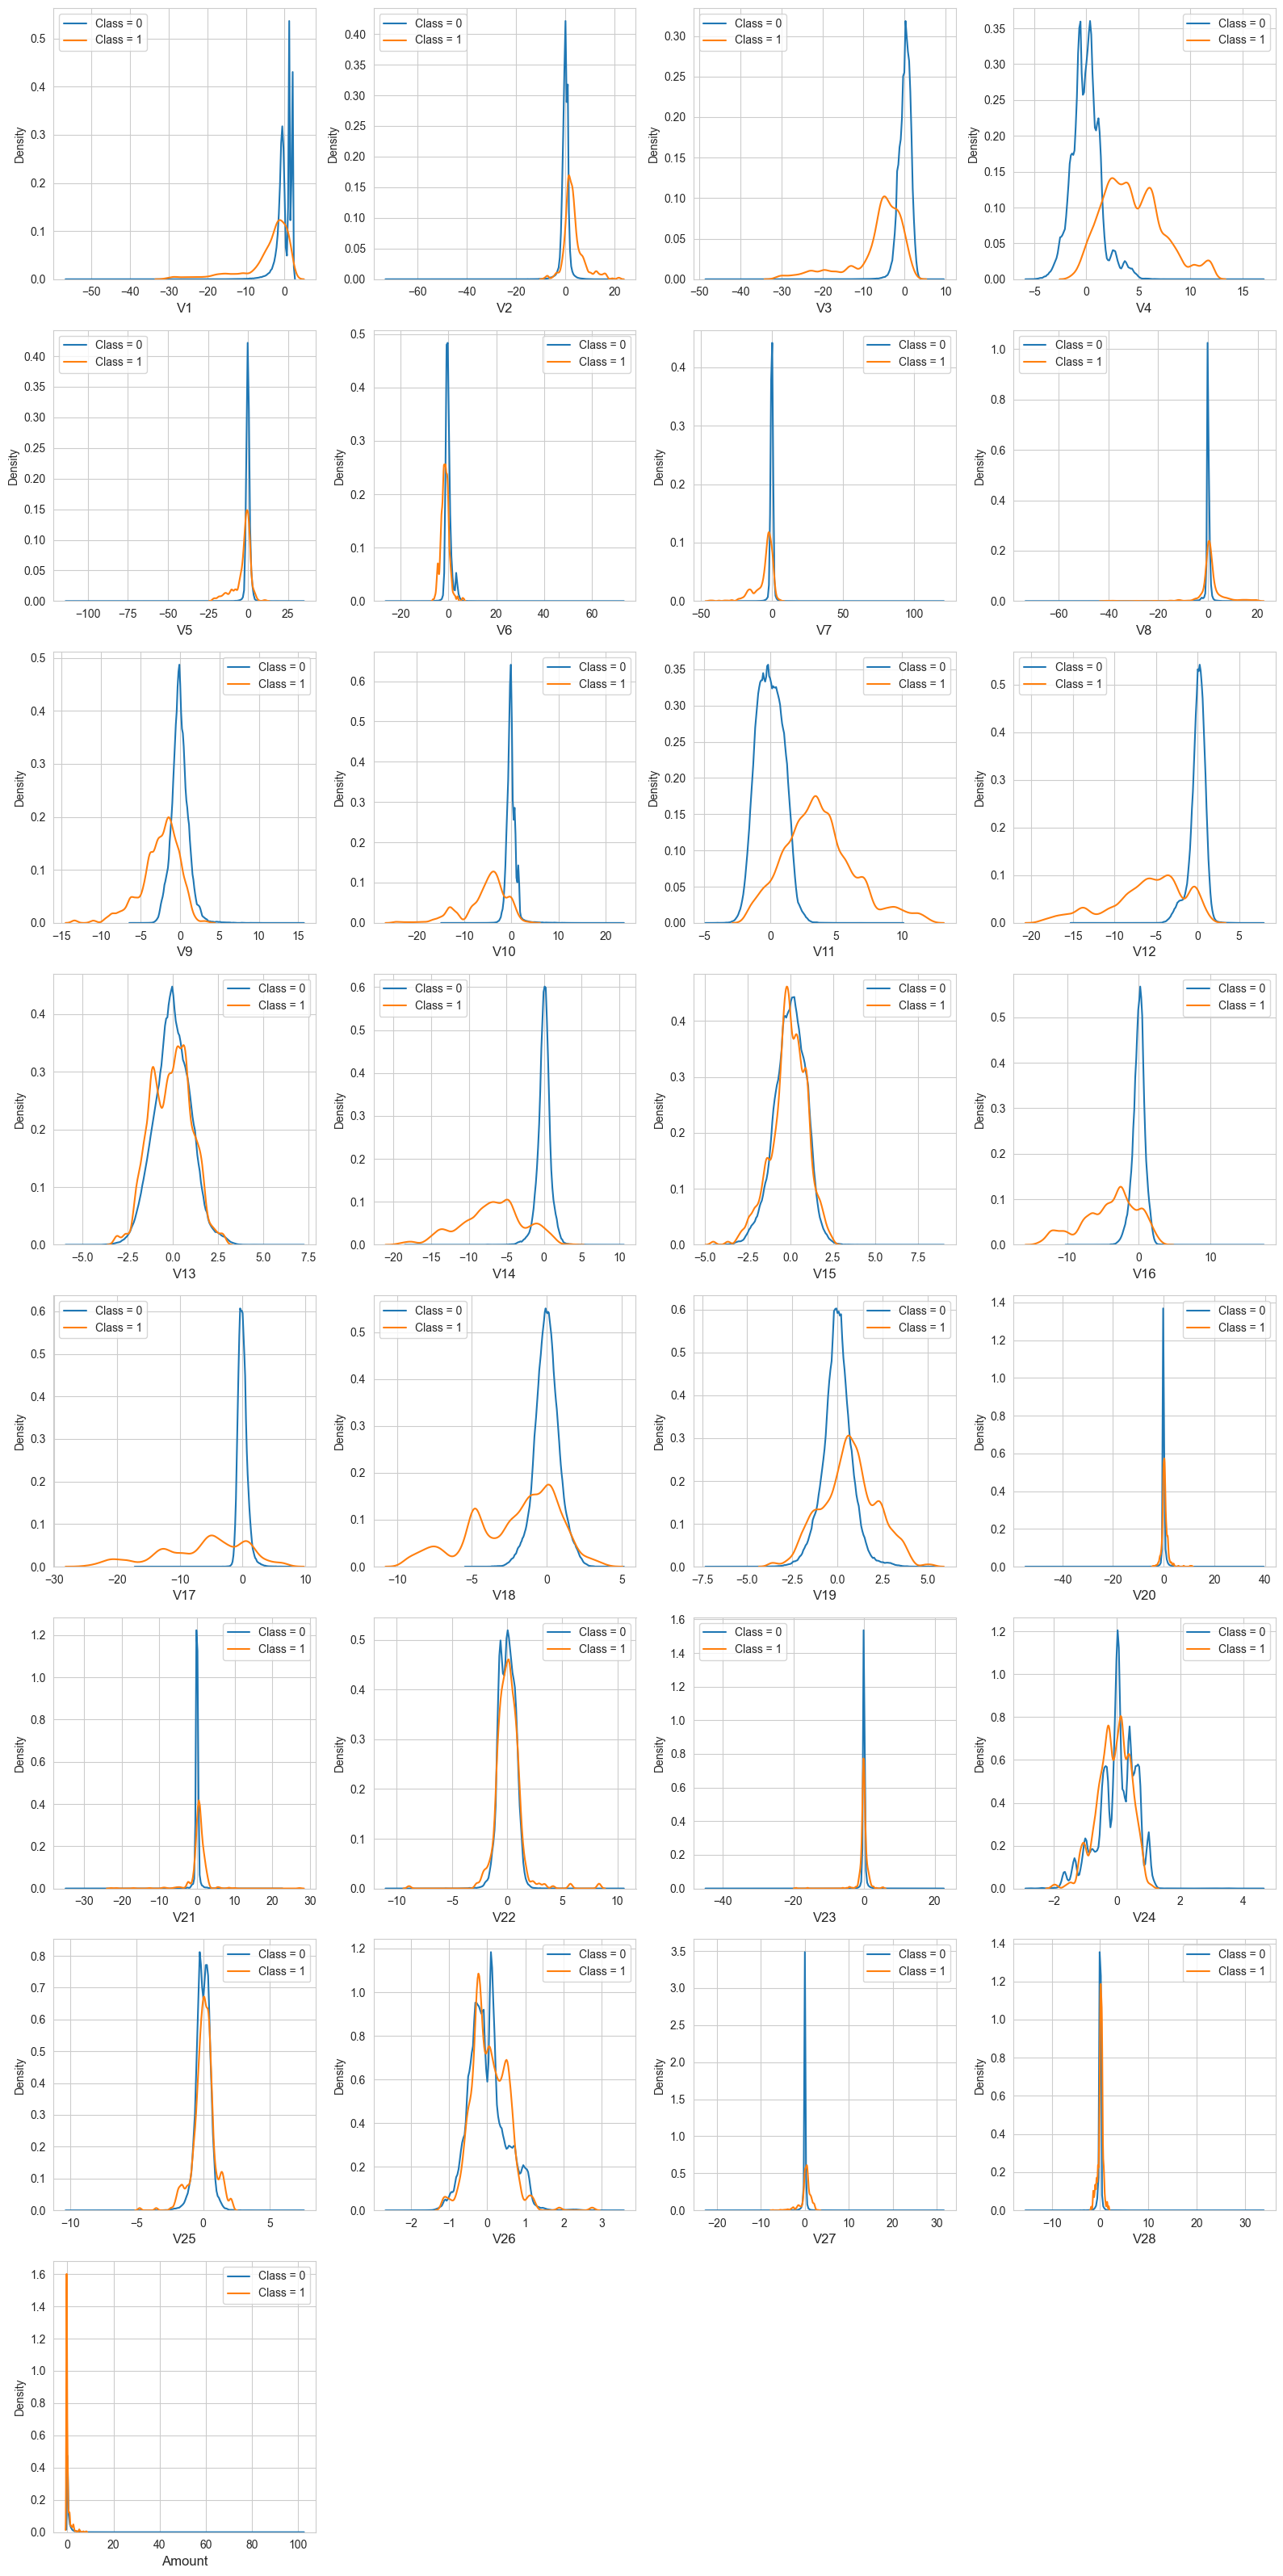

In [19]:
t0 = data_df.loc[data_df['Class'] == 0]
t1 = data_df.loc[data_df['Class'] == 1]

features = [col for col in data_df.columns if col != "Class"]

non_constant_features = [f for f in features if data_df[f].nunique() > 1]

sns.set_style('whitegrid')
n_features = len(non_constant_features)
ncols = 4
nrows = int(np.ceil(n_features / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(16, 4*nrows))
axes = axes.flatten()

for i, feature in enumerate(non_constant_features):
    ax = axes[i]
    sns.kdeplot(t0[feature], bw_adjust=0.5, label="Class = 0", ax=ax, warn_singular=False)
    sns.kdeplot(t1[feature], bw_adjust=0.5, label="Class = 1", ax=ax, warn_singular=False)
    ax.set_xlabel(feature, fontsize=12)
    ax.legend()

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


For some of the features we can observe a good selectivity in terms of distribution for the two values of **Class**: **V4**, **V11** have clearly separated distributions for **Class** values 0 and 1, **V12**, **V14**, **V18** are partially separated, **V1**, **V2**, **V3**, **V10** have a quite distinct profile, whilst **V25**, **V26**, **V28** have similar profiles for the two values of **Class**.  

In general, with just few exceptions, the features distribution for legitimate transactions (values of **Class = 0**)  is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of **Class = 1**) have a skewed (asymmetric) distribution.

## Data Unbalance

Let's check data unbalance with respect with *target* value, i.e. **Class**.

In [20]:
data_df['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

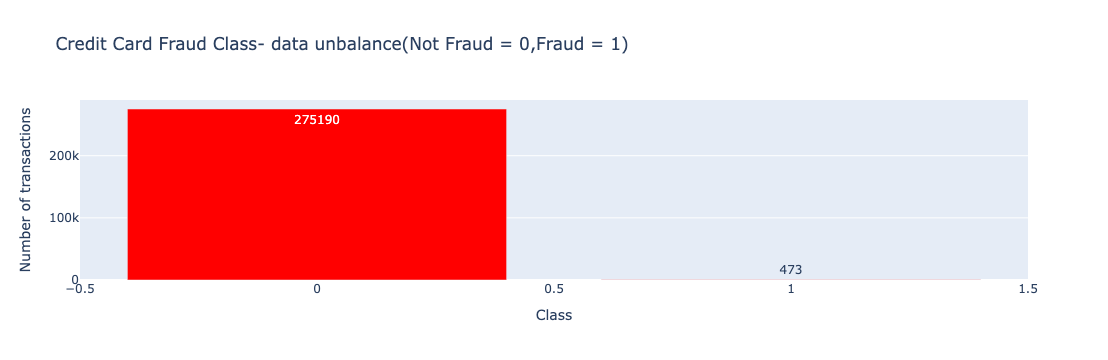

In [21]:
temp = data_df["Class"].value_counts()
df = pd.DataFrame({'Class': temp.index,'values': temp.values})

trace = go.Bar(
    x = df['Class'],y = df['values'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Red"),
    text=df['values']
)
data = [trace]
layout = dict(title = 'Credit Card Fraud Class- data unbalance(Not Fraud = 0,Fraud = 1)',
          xaxis = dict(title = 'Class', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='class')

Only **473** of transaction are fraudulent. That means the data is highly unbalanced with respect with target variable **Class**.

## Train-Test Split

In [22]:
X = data_df.drop('Class', axis = 1)
y = data_df['Class']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Comparative Analysis of Classification Models

In [25]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

classifier = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

for name, clf in classifier.items():
    print(f"\n========== {name} ==========")
    
    # Train
    clf.fit(X_train, y_train)
    
    # Predict
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:,1] if hasattr(clf, "predict_proba") else None
    
    # Metrics
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
    
    if y_prob is not None:
        print(f"ROC-AUC:   {roc_auc_score(y_test, y_prob):.4f}")



========== Logistic Regression ==========
Accuracy:  0.9993
Precision: 0.8906
Recall:    0.6264
F1 Score:  0.7355
ROC-AUC:   0.9720

========== Random Forest ==========
Accuracy:  0.9994
Precision: 0.9054
Recall:    0.7363
F1 Score:  0.8121
ROC-AUC:   0.9324

========== Decision Tree ==========
Accuracy:  0.9989
Precision: 0.6633
Recall:    0.7143
F1 Score:  0.6878
ROC-AUC:   0.8568

========== Naive Bayes ==========
Accuracy:  0.9782
Precision: 0.0573
Recall:    0.7912
F1 Score:  0.1068
ROC-AUC:   0.9441


## Undersampling

In [27]:
normal = data_df[data_df['Class']==0]
fraud = data_df[data_df['Class']==1]

In [28]:
normal.shape

(275190, 30)

In [29]:
fraud.shape

(473, 30)

In [30]:
normal_sample = normal.sample(n=473)

In [31]:
new_data = pd.concat([normal_sample,fraud], ignore_index=True)

In [32]:
new_data['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [33]:
X = new_data.drop('Class', axis = 1)
y= new_data['Class']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
classifier = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

for name, clf in classifier.items():
    print(f"\n========== {name} ==========")
    
    # Train
    clf.fit(X_train, y_train)
    
    # Predict
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:,1] if hasattr(clf, "predict_proba") else None
    
    # Metrics
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
    
    if y_prob is not None:
        print(f"ROC-AUC:   {roc_auc_score(y_test, y_prob):.4f}")


========== Logistic Regression ==========
Accuracy:  0.9368
Precision: 0.9688
Recall:    0.9118
F1 Score:  0.9394
ROC-AUC:   0.9830

========== Random Forest ==========
Accuracy:  0.9474
Precision: 0.9894
Recall:    0.9118
F1 Score:  0.9490
ROC-AUC:   0.9804

========== Decision Tree ==========
Accuracy:  0.9158
Precision: 0.9300
Recall:    0.9118
F1 Score:  0.9208
ROC-AUC:   0.9161

========== Naive Bayes ==========
Accuracy:  0.9000
Precision: 0.9462
Recall:    0.8627
F1 Score:  0.9026
ROC-AUC:   0.9539


## Limitations of Undersampling

1. **Loss of Information** - Randomly removing majority class samples can discard important patterns, potentially reducing the model’s ability to generalize.

2. **Smaller Training Set** - The effective training data size becomes much smaller, which can make complex models underfit.

3. **High Variance** - Model performance can vary significantly depending on which majority samples are randomly selected.

4. **Not Always Representative** - The undersampled dataset may no longer reflect the true distribution of the data, leading to misleading evaluation metrics if applied incorrectly.

5. **Sensitive to Outliers** - If outliers are retained in the minority class or accidentally sampled in the majority class, they can disproportionately affect the model.

6. **Cannot Be Applied to Test Data** - Undersampling is meant for training only; applying it to test data will give unrealistic performance metrics.


## Oversampling

In [36]:
X = data_df.drop('Class', axis = 1)
y= data_df['Class']

In [37]:
X.shape

(275663, 29)

In [38]:
y.shape

(275663,)

In [39]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Step 1: Split BEFORE SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 2: Apply SMOTE ONLY on training set
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("Original training set:", X_train.shape, y_train.shape)
print("After SMOTE:", X_res.shape, y_res.shape)
print("Test set (untouched):", X_test.shape, y_test.shape)
print("Frauds in test:", sum(y_test))


Original training set: (220530, 29) (220530,)
After SMOTE: (440304, 29) (440304,)
Test set (untouched): (55133, 29) (55133,)
Frauds in test: 95


In [40]:
y_res.value_counts()

Class
0    220152
1    220152
Name: count, dtype: int64

In [41]:
classifier = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

for name, clf in classifier.items():
    print(f"\n========== {name} ==========")
    
    # Train
    clf.fit(X_train, y_train)
    
    # Predict
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:,1] if hasattr(clf, "predict_proba") else None
    
    # Metrics
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
    
    if y_prob is not None:
        print(f"ROC-AUC:   {roc_auc_score(y_test, y_prob):.4f}")


========== Logistic Regression ==========
Accuracy:  0.9991
Precision: 0.8462
Recall:    0.5789
F1 Score:  0.6875
ROC-AUC:   0.9702

========== Random Forest ==========
Accuracy:  0.9994
Precision: 0.9211
Recall:    0.7368
F1 Score:  0.8187
ROC-AUC:   0.9351

========== Decision Tree ==========
Accuracy:  0.9991
Precision: 0.7727
Recall:    0.7158
F1 Score:  0.7432
ROC-AUC:   0.8577

========== Naive Bayes ==========
Accuracy:  0.9777
Precision: 0.0598
Recall:    0.8105
F1 Score:  0.1114
ROC-AUC:   0.9638


## Cross-Validation

In [42]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score

In [43]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [44]:
f1_scorer = make_scorer(f1_score)

In [45]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer, f1_score

# Define F1 scorer
f1_scorer = make_scorer(f1_score)

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()
}

for name, clf in classifiers.items():
    # Build pipeline: SMOTE + Classifier
    model = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('clf', clf)
    ])
    
    # Cross-validation (SMOTE applied inside each fold safely)
    cv_scores = cross_val_score(model, X, y, cv=skf, scoring=f1_scorer, n_jobs=-1)
    
    print(f"\n{name}")
    print("F1 scores for each fold:", cv_scores)
    print("Mean F1 score:", cv_scores.mean())



Logistic Regression
F1 scores for each fold: [0.11899642 0.11090107 0.10842587 0.10230467 0.10990415]
Mean F1 score: 0.11010643426372602

Decision Tree
F1 scores for each fold: [0.53623188 0.4950495  0.51877133 0.47682119 0.50169492]
Mean F1 score: 0.5057137654747408

Random Forest
F1 scores for each fold: [0.82954545 0.84444444 0.85869565 0.83516484 0.85714286]
Mean F1 score: 0.844998648694301

Naive Bayes
F1 scores for each fold: [0.11519778 0.09777228 0.10851648 0.10532915 0.10342599]
Mean F1 score: 0.10604833588961313


## Train Random Forest with SMOTE-balanced data

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Balance training data with SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_res, y_res)

# Predict on original test set (not SMOTE)
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]


In [48]:
print("Total samples:", len(y))
print("Fraud cases:", sum(y))
print("Normal cases:", len(y) - sum(y))

Total samples: 275663
Fraud cases: 473
Normal cases: 275190


In [49]:
print("Train set:", X_train.shape, y_train.shape)
print("After SMOTE:", X_res.shape, y_res.shape)
print("Test set:", X_test.shape, y_test.shape)
print("Frauds in test:", sum(y_test))


Train set: (220530, 29) (220530,)
After SMOTE: (440304, 29) (440304,)
Test set: (55133, 29) (55133,)
Frauds in test: 95


## Confusion Matrix

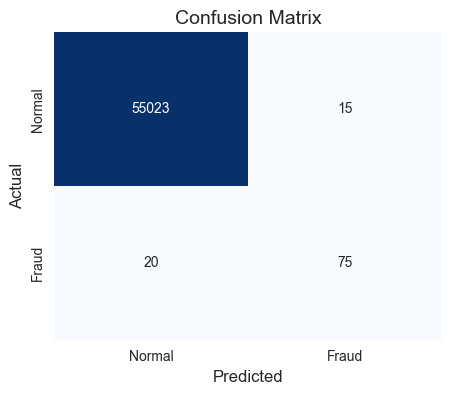

Confusion Matrix:
 [[55023    15]
 [   20    75]]

Metrics:
Accuracy:  0.9994
Precision: 0.8333
Recall:    0.7895
F1-score:  0.8108

Classification Report:
               precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     55038
       Fraud       0.83      0.79      0.81        95

    accuracy                           1.00     55133
   macro avg       0.92      0.89      0.91     55133
weighted avg       1.00      1.00      1.00     55133



In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=["Normal", "Fraud"],
            yticklabels=["Normal", "Fraud"],
            linewidths=0.0)  # removes gridlines inside

plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("\nMetrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

print("\nClassification Report:\n",
      classification_report(y_test, y_pred, target_names=["Normal","Fraud"]))

## ROC Curve

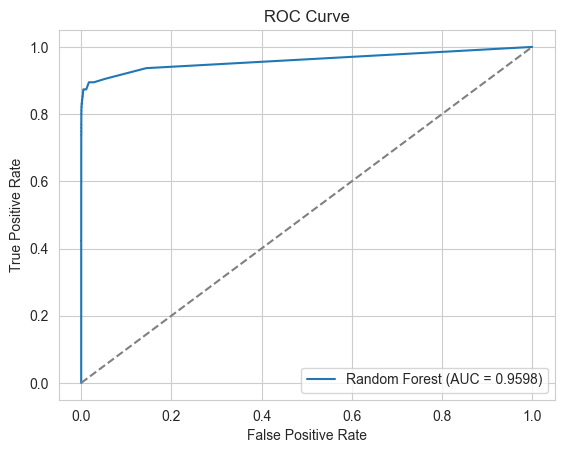

In [53]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.4f})")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## Precision-Recall Curve

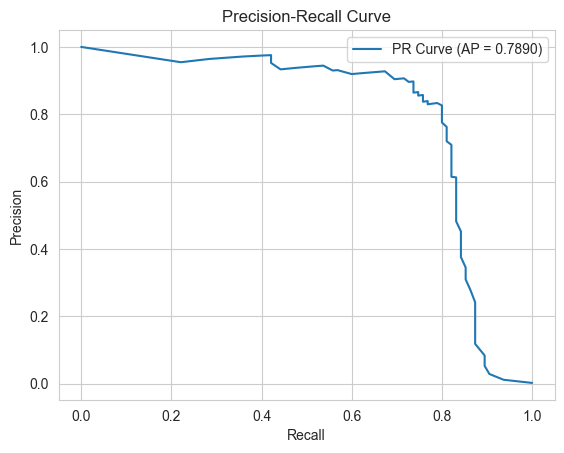

In [54]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

plt.plot(recall, precision, label=f"PR Curve (AP = {avg_precision:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


## Threshold Tuning

In [55]:
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score

# Train a classifier (example: Random Forest)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_res, y_res)

# Predicted probabilities for fraud
y_prob = clf.predict_proba(X_test)[:, 1]

# Try multiple thresholds
thresholds = np.arange(0.1, 1.0, 0.05)
best_thresh = 0.5
best_f1 = 0

for thresh in thresholds:
    y_pred = (y_prob >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred)
    print(f"Threshold={thresh:.2f} → F1={f1:.4f}, Precision={precision_score(y_test, y_pred):.4f}, Recall={recall_score(y_test, y_pred):.4f}")
    
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = thresh

print("\n Best Threshold:", best_thresh)
print("Best F1 Score:", best_f1)

# Use the best threshold for final predictions
y_pred_final = (y_prob >= best_thresh).astype(int)


Threshold=0.10 → F1=0.4538, Precision=0.3092, Recall=0.8526
Threshold=0.15 → F1=0.6320, Precision=0.5097, Recall=0.8316
Threshold=0.20 → F1=0.7054, Precision=0.6124, Recall=0.8316
Threshold=0.25 → F1=0.7393, Precision=0.6724, Recall=0.8211
Threshold=0.30 → F1=0.7739, Precision=0.7404, Recall=0.8105
Threshold=0.35 → F1=0.7958, Precision=0.7917, Recall=0.8000
Threshold=0.40 → F1=0.8042, Precision=0.8085, Recall=0.8000
Threshold=0.45 → F1=0.8128, Precision=0.8261, Recall=0.8000
Threshold=0.50 → F1=0.8108, Precision=0.8333, Recall=0.7895
Threshold=0.55 → F1=0.8022, Precision=0.8391, Recall=0.7684
Threshold=0.60 → F1=0.8045, Precision=0.8571, Recall=0.7579
Threshold=0.65 → F1=0.7955, Precision=0.8642, Recall=0.7368
Threshold=0.70 → F1=0.8092, Precision=0.8974, Recall=0.7368
Threshold=0.75 → F1=0.8023, Precision=0.8961, Recall=0.7263
Threshold=0.80 → F1=0.7805, Precision=0.9275, Recall=0.6737
Threshold=0.85 → F1=0.7342, Precision=0.9206, Recall=0.6105
Threshold=0.90 → F1=0.6846, Precision=0.

## Apply Best Threshold

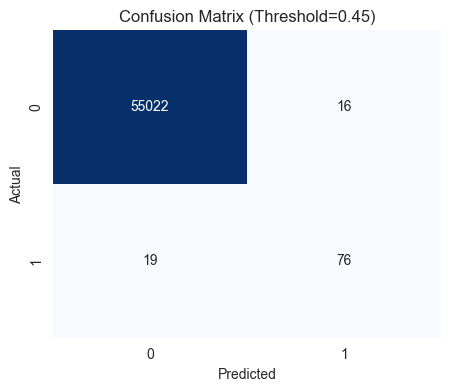

Confusion Matrix:
 [[55022    16]
 [   19    76]]

Metrics:
Accuracy:  0.9994
Precision: 0.8261
Recall:    0.8000
F1-score:  0.8128


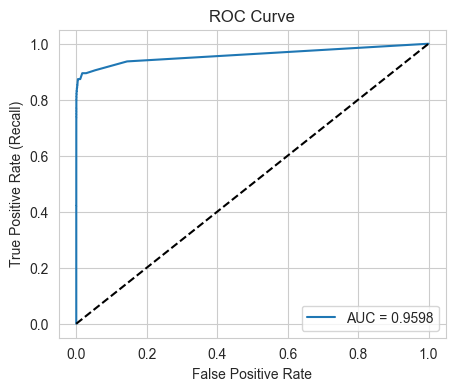

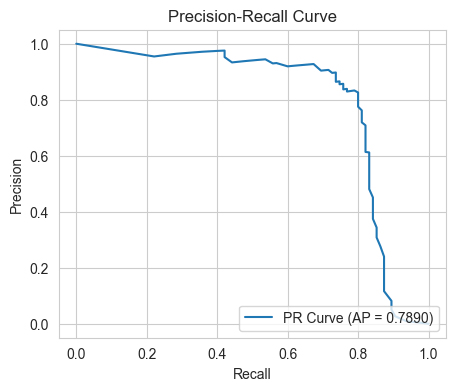

In [57]:
best_thresh = 0.45
y_pred_final = (y_prob >= best_thresh).astype(int)

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.title(f"Confusion Matrix (Threshold={best_thresh:.2f})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

accuracy = accuracy_score(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)

print("Confusion Matrix:\n", cm)
print("\nMetrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")


# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# --- Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(5,4))
plt.plot(recall, precision, label=f"PR Curve (AP = {avg_precision:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower right")
plt.show()


## Conclusion

### Final Results on the Untouched Test Set:
| Metric       | Score   |
|--------------|---------|
| Accuracy     | 0.99  |
| Precision    | 0.82  |
| Recall       | 0.80 |
| F1-score     | 0.81 |
| ROC-AUC      | 0.95 |
| PR-AP (Average Precision) | 0.78 |

### Interpretation:
The Random Forest model achieves a **good balance between catching frauds and avoiding false alarms**. While not perfect (some frauds are still missed), it significantly outperforms random guessing and would be valuable in a real-world fraud detection pipeline. 
By applying a threshold of 0.45, our Random Forest model achieved a strong balance with F1 = 0.81, Precision = 0.83, and Recall = 0.80, making it highly effective in identifying fraudulent transactions while minimizing false positives.

### Next Steps:
- Experiment with **ensemble methods** (e.g., stacking models).  
- Explore **cost-sensitive learning** to weigh fraud cases more heavily.  
- Deploy the model with **real-time monitoring** and periodic re-training, since fraud patterns evolve over time.  
